Numpy
numpy is short for Numerical Python.

Numerical data
Datasets come from a wide range of sources and formats: it could be collections of numerical measurements, text corpus, images, audio clips, or basically anything. No matter the format, the first step in data science is to transform it into array of numbers



In [6]:
heights = [
    189,150,135,135,165,123,142,163,135,
    143,163,136,124,164,173,178,185,174,
    182,142,122,183,181,191,193,102,192,
    144,122,173,171,123,172,178,103,100,
    136,193,123,161,171,177,142,122,128
]

to know the number of presidents that are taller than 188cm, we could iterate through the list, compare each element against 188, and increase the count by 1 as the criteria is met

In [7]:
for i in heights:
    if i >= 188:
        count = []
        counts = 0
        counts += 1
        count.append(i)
        
        
count, counts

([193], 1)

In [8]:
import numpy as np

In [9]:
heights_arr = np.array(heights)
#print((heights_arr > 150).sum())

In [10]:
heights_arr

array([189, 150, 135, 135, 165, 123, 142, 163, 135, 143, 163, 136, 124,
       164, 173, 178, 185, 174, 182, 142, 122, 183, 181, 191, 193, 102,
       192, 144, 122, 173, 171, 123, 172, 178, 103, 100, 136, 193, 123,
       161, 171, 177, 142, 122, 128])

In [11]:
total = (heights_arr > 150).sum()
total

23

size and shape

size is to get the length of array

In [12]:
heights_arr.size

45

for shape, the output is a tuple. shape is to get the dimension of array

In [13]:
heights_arr.shape

(45,)

Reshape

In [14]:
ages = [
    53,34,23,56,36,33,76,45,74,
    47,43,85,44,89,53,46,23,47,
    85,43,68,57,85,42,35,78,58,
    47,79,90,67,57,89,97,98,56,
    75,46,78,99,76,43,36,67,47
]

In [15]:
heights_and_ages = heights + ages
heights_and_ages_arr = np.array(heights_and_ages)
heights_and_ages_arr

array([189, 150, 135, 135, 165, 123, 142, 163, 135, 143, 163, 136, 124,
       164, 173, 178, 185, 174, 182, 142, 122, 183, 181, 191, 193, 102,
       192, 144, 122, 173, 171, 123, 172, 178, 103, 100, 136, 193, 123,
       161, 171, 177, 142, 122, 128,  53,  34,  23,  56,  36,  33,  76,
        45,  74,  47,  43,  85,  44,  89,  53,  46,  23,  47,  85,  43,
        68,  57,  85,  42,  35,  78,  58,  47,  79,  90,  67,  57,  89,
        97,  98,  56,  75,  46,  78,  99,  76,  43,  36,  67,  47])

In [16]:
heights_and_ages_arr.shape

(90,)

this produces one long array. it would be clearer if we could align height and age for each president and reorganize the data into a 2 by 45 matrix where the first row contains all heights and the second row contains ages, to achieve this, a new array can be created by calling numpy.ndarray.reshape with new dimensions specified in a tuple

In [17]:
heights_and_ages_arr.reshape(2,45)

array([[189, 150, 135, 135, 165, 123, 142, 163, 135, 143, 163, 136, 124,
        164, 173, 178, 185, 174, 182, 142, 122, 183, 181, 191, 193, 102,
        192, 144, 122, 173, 171, 123, 172, 178, 103, 100, 136, 193, 123,
        161, 171, 177, 142, 122, 128],
       [ 53,  34,  23,  56,  36,  33,  76,  45,  74,  47,  43,  85,  44,
         89,  53,  46,  23,  47,  85,  43,  68,  57,  85,  42,  35,  78,
         58,  47,  79,  90,  67,  57,  89,  97,  98,  56,  75,  46,  78,
         99,  76,  43,  36,  67,  47]])

data type
another characteristic about numpy array is that it is homogenous, meaning each element must be of the same data type.
for example, in heights_arr, we recorded all heights in whole numbers, thus each element is stored as an integer in  the array. to check the data type, use numpy.ndarray.dtype

In [18]:
heights_and_ages_arr.dtype

dtype('int32')

In [19]:
a = np.array([1,2,3,4])
a.shape

(4,)

In [20]:
a.reshape(4,1)

array([[1],
       [2],
       [3],
       [4]])

Pandas vs Numpy
what if we want to inspect the data on Abraham Lincoln in height_age_arr but cannot remember his integer position. is there a convenient way to access the data by indexing the name of the president like:

height_age_arr['Abraham Lincoln']

unfortunately, we will receive an error message. however, it is possible to do this in pandas. the pandas library is built on top of numpy, meaning a lot of features, methods, and functions are shared

by convention, import the library under a short time name 'pd'

import pandas as pd

Series

the series is one building block in pandas. Pandas Series is a non-dimensional labeled array that can hold data of any type (integer, string, float, python objects etc), similar to a column in an excel spreadsheet. the axis labels are collectively called index

if we are given a bag of letters a,b,c, and count how many of each we have, we find that there are 1a,2b's, and 3c's. we could create a series by supplying a list of counts and their corresponding lables

In [21]:
import pandas as pd

In [22]:
pd.Series(np.array([1,2,3]), index=['a','b','c'])

a    1
b    2
c    3
dtype: int32

In [23]:
pd.Series([1,2,3], index=['a','b','c'])

a    1
b    2
c    3
dtype: int64

In [24]:
pd.Series({'a':1,'b':2,'c':3})

a    1
b    2
c    3
dtype: int64

In [25]:
series = pd.Series({'a':1,'b':2,'c':3})
series['a']

1

accessing the values by its index, rather than the integer position comes in handy when the dataset is of thousands, if not millions, of rows. Series is the building block for the DataFrame we will introduce next

DataFrames
in data science, data is usually more than one-dimensional, and of different data types; thus Series is not sufficient. DataFrames are 2darrays with both row and column labels. one way to create DataFrame from scratch is to pass in a dict. for example, this week, we sold 3 bottles of red wine to Adam, 6 to Bob and 10 to Charles. we can organize the data into DataFrame by creating a dict 'wine_dict' with the number of bottles of each wine type we sold, then pass it along with the customer names as index to create a DataFrame 'Sales'

In [26]:
wine_dict ={
    'red_wine' : [3,6,5],
    'white_wine' : [5,0,10]
}

sales = pd.DataFrame(wine_dict, index = ['adam','bob','charles'])
sales

,red_wine,white_wine
adam,3,5
bob,6,0
charles,5,10


In [27]:
sales['red_wine']

adam       3
bob        6
charles    5
Name: red_wine, dtype: int64

In [28]:
sales['white_wine']

adam        5
bob         0
charles    10
Name: white_wine, dtype: int64

Inspect a DataFrame- shape and size
let's take a look at a new DataFrame, in addition to heights and ages of the presidents, there is information on the order, names and parties. the DataFrame presidents_df is read from a CSV files as follows

In [29]:
presidents_df = pd.read_csv('president_heights_party.csv', index_col='name')
presidents_df

,order,age,height,party
name,,,,
George Washington,1,57,189,none
John Adams,2,61,170,federalist
Thomas Jefferson,3,57,189,democratic-republican
James Madison,4,57,163,democratic-republican
James Monroe,5,58,183,democratic-republican
John Quincy Adams,6,57,171,democratic-republican
Andrew Jackson,7,61,185,democratic
Martin Van Buren,8,54,168,democratic
William Henry Harrison,9,68,173,whig


similar to numpy, to get the dimensions of a DataFrame, use .shape

there are 45 rows and 4 columns in the DataFrame. to get the number of rows we can access the first element in the tuple

In [30]:
presidents_df.shape[0]

45

In [31]:
presidents_df.shape

(45, 4)

Inspect a DataFrame - info 

use .info() to get an overview of the DataFrame. its output includes index, column names, count of non-null values, dtypes, and memory usage

In [32]:
presidents_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, George Washington to Donald J. Trump
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   order   45 non-null     int64 
 1   age     45 non-null     int64 
 2   height  45 non-null     int64 
 3   party   45 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.8+ KB


Rows with .loc

instead of memorizing the integer positions to locate the order, age, height, and party information of Abraham Lincoln, with DataFrame, we can access it by the name using .loc

In [33]:
presidents_df.loc['Abraham Lincoln']

order             16
age               52
height           193
party     republican
Name: Abraham Lincoln, dtype: object

the result is a pandas Series of shape(4,)

In [34]:
type(presidents_df.loc['Abraham Lincoln'])

pandas.core.series.Series

we can also slice by index. say we are interested in gathering information on all of the presidents between Abraham Lincoln and Ulysses S. Grant:

In [35]:
presidents_df.loc['Abraham Lincoln':'Ulysses S. Grant']

,order,age,height,party
name,,,,
Abraham Lincoln,16,52,193,republican
Andrew Johnson,17,56,178,national union
Ulysses S. Grant,18,46,173,republican


the result is a new DataFrame, a subset of presidents_df

Rows with .iloc

alternatively, if we do know the integer position(s), we can use .iloc to access the row(s)

In [36]:
presidents_df.iloc[15]

order             16
age               52
height           193
party     republican
Name: Abraham Lincoln, dtype: object

to gather information from the 16th to 18th presidents, we can then

In [37]:
presidents_df.iloc[15:18]

,order,age,height,party
name,,,,
Abraham Lincoln,16,52,193,republican
Andrew Johnson,17,56,178,national union
Ulysses S. Grant,18,46,173,republican


Columns

we can retrieve an entire column from presidents_df by name. first we access all the column names:

In [38]:
presidents_df.columns

Index(['order', 'age', 'height', 'party'], dtype='object')

which returns an index object containing all column name. then we can access the column height by

In [39]:
presidents_df['height']

name
George Washington         189
John Adams                170
Thomas Jefferson          189
James Madison             163
James Monroe              183
John Quincy Adams         171
Andrew Jackson            185
Martin Van Buren          168
William Henry Harrison    173
John Tyler                183
James K. Polk             173
Zachary Taylor            173
Millard Fillmore          175
Franklin Pierce           178
James Buchanan            183
Abraham Lincoln           193
Andrew Johnson            178
Ulysses S. Grant          173
Rutherford B. Hayes       174
James A. Garfield         183
Chester A. Arthur         183
Grover Cleveland          180
Benjamin Harrison         168
Grover Cleveland          180
William McKinley          170
Theodore Roosevelt        178
William Howard Taft       182
Woodrow Wilson            180
Warren G. Harding         183
Calvin Coolidge           178
Herbert Hoover            182
Franklin D. Roosevelt     188
Harry S. Truman           175
Dwigh

more with .loc

if we wanted to access columns order, age, and height, we can do it with .loc. .loc allows us to access any of the columns. for example, if we wanted to access columns from order through height for the first three presidents

In [40]:
presidents_df.loc[:,'order':'height'].head(n=3)

,order,age,height
name,,,
George Washington,1,57,189
John Adams,2,61,170
Thomas Jefferson,3,57,189


the index in pandas makes retrieving information from rows or columns convenient and easy, especially when the data set is large or there are many columns. therefore, we don't have to memorize the integer positions of each row or column

min/max/mean

it's not practical to print out an entire dataset with a large sample size. instead, we want to summarize and characterize sample data using only a few values. Summary statistics include measures of location and measures of spread. Measures of location and measures of spread. Measures of location are quantities that represent the average value of a variable while measures of spread represent how similar or dissimilar the values of a variable are

Measures of location - minimum, maximum, mean
mesures of spread - range, variance, standard deviation

the simplest summary statistics, which are measures of location, include the minimum, the smallest number

In [41]:
presidents_df.min()

order              1
age               42
height           163
party     democratic
dtype: object

maximum, the largest number

In [42]:
presidents_df.max()

order       45
age         70
height     193
party     whig
dtype: object

and mean, the average:

In [43]:
presidents_df[['age','height']].mean()

age        55.0
height    180.0
dtype: float64

Quantiles

quantiles are cut points dividing the range of data into continuous intervals with an equal number of observations. median is the only cut point in 2-quantiles, such that 50% of the data is below the median with other  half above it.

Qaurtiles let us quickly divide a set of data into four groups, making it easy to see which of the four groups a particular data point is in. Quartiles are then 4-quantiles, that is, 25% of the data are between the minimum and first quartile, the next 25% between the first quartile and median, the next 25% is between the median and the third quartile, and the last 25% of the data lies between the third quartile and the maximum

In [44]:
presidents_df['age'].median()

55.0

In [45]:
presidents_df['age'].quantile([0.25,0.5,0.75,1])

0.25    51.0
0.50    55.0
0.75    58.0
1.00    70.0
Name: age, dtype: float64

variance and standard deviation

in probability and statistics, variance is the mean squared deviation of each point from the meand of the entire dataset
you can think of it as how far apart a set of numbers are spread out from their average value. Standard deviation is the square root of variance. a high standard implies a large spread, and a low std indicates a small spread or most points are close to the mean

In [46]:
const = pd.Series([2,2,2])
const.var()
const.std()

0.0

describe()

describe() prints out almost all of the summary statistics mentioned previously except for the variance. in addition, it counts all non-null values of each column

In [47]:
presidents_df.describe()

,order,age,height
count,45.000000,45.000000,45.000000
mean,23.022222,55.000000,180.000000
std,13.136502,6.595453,6.977236
min,1.000000,42.000000,163.000000
25%,12.000000,51.000000,175.000000
50%,23.000000,55.000000,182.000000
75%,34.000000,58.000000,183.000000
max,45.000000,70.000000,193.000000


In [48]:
presidents_df['age'].describe()

count    45.000000
mean     55.000000
std       6.595453
min      42.000000
25%      51.000000
50%      55.000000
75%      58.000000
max      70.000000
Name: age, dtype: float64

Groupby

Summary statistics on an entire dataset provides a good overall view, but often we're interested in some calculation conditional upon a given  label or category. for example, what is the average height conditional of the presidents party?

To find the value based on a condition, we can use the groupby operation. think of groupby doing three steps: split,apply, and continue. the split step breaks the DataFrame into multiple DataFrames based on the value of the specified key; the apply step is to perform the operation inside each smaller DataFrame; the last step combines the pieces back into the larger DataFrame

In [49]:
presidents_df.groupby('party')

the .groupby('party') returns a DataFrameGroupBy object not a set of DataFrames. To produce a result, apply an aggregate(.mean()) to this DataFrameGroupBy object

In [50]:
presidents_df.groupby('party').mean()

,order,age,height
party,,,
democratic,26.066667,52.600000,181.066667
democratic-republican,4.500000,57.250000,176.500000
federalist,2.000000,61.000000,170.000000
national union,17.000000,56.000000,178.000000
none,1.000000,57.000000,189.000000
republican,29.631579,55.263158,180.894737
whig,11.000000,58.250000,176.000000


Aggregation

we can also perform multiple operations on the grouby object using .agg() method. it takes a string, a function, or a list thereof. for example. we would like to obtain the min, median, and max values of heights grouped by party

In [51]:
presidents_df.groupby('party')['height'].agg(['min', np.median, max])

C:\Users\HP\AppData\Local\Temp\ipykernel_8844\263542307.py:1: FutureWarning: The provided callable <function median at 0x000001B67763A520> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  presidents_df.groupby('party')['height'].agg(['min', np.median, max])
C:\Users\HP\AppData\Local\Temp\ipykernel_8844\263542307.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  presidents_df.groupby('party')['height'].agg(['min', np.median, max])


,min,median,max
party,,,
democratic,168,180.0,193
democratic-republican,163,177.0,189
federalist,170,170.0,170
national union,178,178.0,178
none,189,189.0,189
republican,168,182.0,193
whig,173,174.0,183


from the output we can see, the heights of the democratic presidents range from 168 to 193cm, with a median at 180cm.

often time we are interested in different summary statistics for multiple columns. for instance, we would like to check the median and mean of heights, but minimum and maximum for ages, grouped by party. in this case, we can pass a dict with key indicate the column name and value indicate the functions

In [52]:
presidents_df.groupby('party').agg({'height': [np.mean,np.median,min,max]})

C:\Users\HP\AppData\Local\Temp\ipykernel_8844\2193529212.py:1: FutureWarning: The provided callable <function mean at 0x000001B67750FC40> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  presidents_df.groupby('party').agg({'height': [np.mean,np.median,min,max]})
C:\Users\HP\AppData\Local\Temp\ipykernel_8844\2193529212.py:1: FutureWarning: The provided callable <function median at 0x000001B67763A520> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  presidents_df.groupby('party').agg({'height': [np.mean,np.median,min,max]})
C:\Users\HP\AppData\Local\Temp\ipykernel_8844\2193529212.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable wil

height                 
                             mean median  min  max
party                                             
democratic             181.066667  180.0  168  193
democratic-republican  176.500000  177.0  163  189
federalist             170.000000  170.0  170  170
national union         178.000000  178.0  178  178
none                   189.000000  189.0  189  189
republican             180.894737  182.0  168  193
whig                   176.000000  174.0  173  183

In [53]:
presidents_df.groupby('party').agg({'height': [np.median, np.mean],
                                    'age':[min,max]})

C:\Users\HP\AppData\Local\Temp\ipykernel_8844\3503102215.py:1: FutureWarning: The provided callable <function median at 0x000001B67763A520> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  presidents_df.groupby('party').agg({'height': [np.median, np.mean],
C:\Users\HP\AppData\Local\Temp\ipykernel_8844\3503102215.py:1: FutureWarning: The provided callable <function mean at 0x000001B67750FC40> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  presidents_df.groupby('party').agg({'height': [np.median, np.mean],
C:\Users\HP\AppData\Local\Temp\ipykernel_8844\3503102215.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used direct

height             age    
                      median        mean min max
party                                           
democratic             180.0  181.066667  43  65
democratic-republican  177.0  176.500000  57  58
federalist             170.0  170.000000  61  61
national union         178.0  178.000000  56  56
none                   189.0  189.000000  57  57
republican             182.0  180.894737  42  70
whig                   174.0  176.000000  50  68

using groupby and agg provides us flexibility and therefore power to look into various perspectives of a variable or column condition on categories

Matplotlib
a picture is worth a thousand words. rings true in data science. Data visualization can reveal patterns that are not obvious and communicate the insights more effectively. in this part, we will take a look at the matplotlib library, one of the most popular data visualization tools, operating on numpy arrays as well as pandas series and DataFrame. 

In [54]:
import matplotlib as mpl

specifically, the module matplotlib.pyplot, a collection of command style functions that make matplotlib work like MATLAB, will be used for the rest of the course

In [55]:
import matplotlib.pyplot as plt

matplotlib.pyplot is a collection of functions that make plotting in python work like MATLAB. each function makes some change to a figure, e.g creates a figure, creates a plotting area in a figure, plots lines, annotates the plots with labels. e.t.c as we will see in the following lessons

Basics
for all matplotlib plots, first create a figure and an axes object, to show the plot call 'plt.show(). the figure contains all the objects, including axes, graphics, texts, and labels. the axes is a bounding box with ticks and labels. think of axes as an individual plot

In [56]:
import matplotlib.pyplot as plt

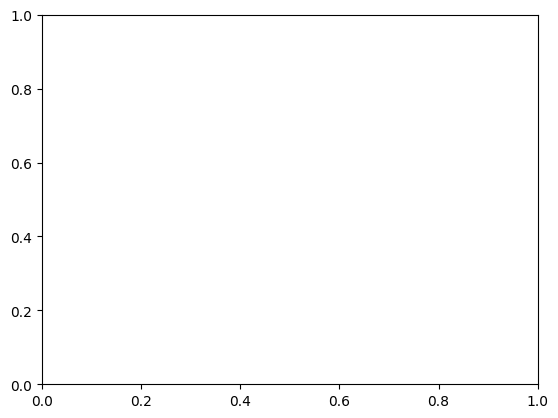

In [57]:
fig = plt.figure()
ax = plt.axes()
plt.show()

matplotlib.pyplot provides many customization features

line plot
let's start with a beautiful wave function, sine function, sin(x), where x ranges from 0 to 10. we need to generate the sequence along the x-axis, an evenly spaced array, via linspace()

In [60]:
x = np.linspace(0,10,1000)
y = np.sin(x)
y

array([ 0.        ,  0.01000984,  0.02001868,  0.03002552,  0.04002934,
        0.05002916,  0.06002396,  0.07001275,  0.07999452,  0.08996827,
        0.09993302,  0.10988774,  0.11983146,  0.12976317,  0.13968188,
        0.14958659,  0.15947632,  0.16935006,  0.17920684,  0.18904566,
        0.19886554,  0.20866549,  0.21844453,  0.22820168,  0.23793597,
        0.24764642,  0.25733206,  0.26699191,  0.276625  ,  0.28623038,
        0.29580708,  0.30535414,  0.3148706 ,  0.32435552,  0.33380793,
        0.3432269 ,  0.35261147,  0.36196071,  0.37127369,  0.38054946,
        0.3897871 ,  0.39898569,  0.4081443 ,  0.41726201,  0.42633791,
        0.4353711 ,  0.44436066,  0.45330569,  0.46220531,  0.47105861,
        0.47986471,  0.48862273,  0.49733179,  0.50599102,  0.51459954,
        0.52315651,  0.53166105,  0.54011232,  0.54850948,  0.55685167,
        0.56513807,  0.57336784,  0.58154016,  0.58965421,  0.59770917,
        0.60570425,  0.61363863,  0.62151153,  0.62932216,  0.63

to plot as before, we first create the figure and axes objects

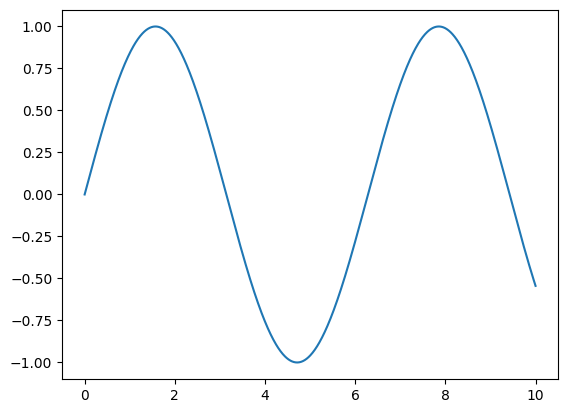

In [62]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x,y)
plt.show()

labels and titles
one critical component of every figure is the figure title. the job of the title is to accurately communicate what the figure is about. in addition, axes need titles, or more commonly referred to axis as labels. the axis labels explain what the plotted data values are. we can specifiy the x and y axis labels and a title using plt.xlabel() plt.ylabel() and plt.title()

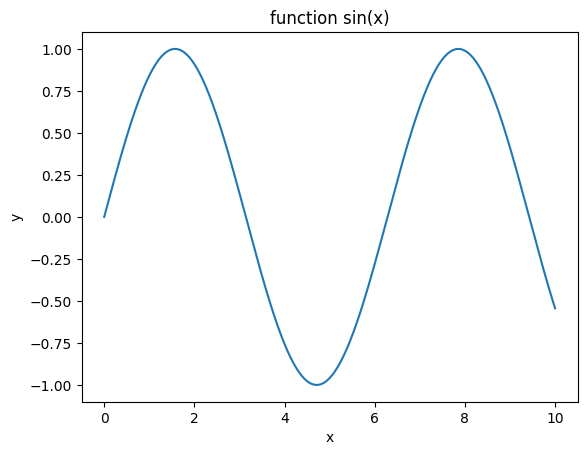

In [65]:
x = np.linspace(0,10,1000)
y - np.sin(x)

plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('function sin(x)')
plt.show()

multiple lines
usually there are various datasets of similar nature, and we would like to compare them and observe the differences. we can plot multiple lines on the same figure. say, the sin function capture the tides on the east coast and cos function capture the tides on the west coast at the same time, we can plot them both on the same figure by calling the .plot() function multiple times

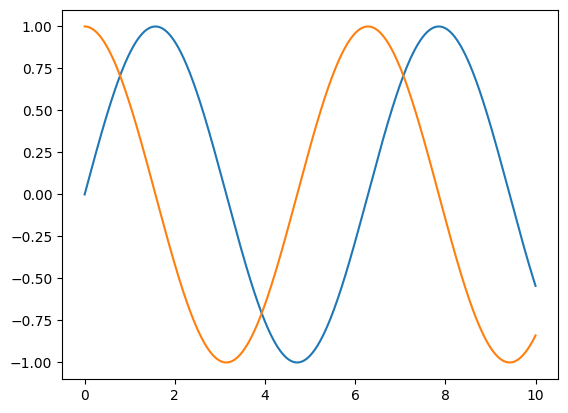

In [66]:
x = np.linspace(0,10,1000)
plt.plot(x,np.sin(x))
plt.plot(x,np.cos(x))
plt.show()

colors and line styles can be specified to differentiate lines:

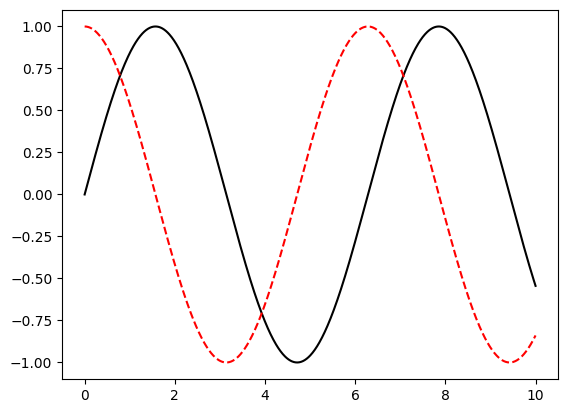

In [67]:
x = np.linspace(0,10,1000)
plt.plot(x, np.sin(x), color = 'k')
plt.plot(x, np.cos(x), color = 'r', linestyle = '--')
plt.show()

note that we specified basic colors using a single letter, that is, k for black and r for red. more examples include b for blue, g for green, c for cyan, etc. for more details on the use of colors in matplotlib 

Legend
when there are multiple lines on a single axes, it's often useful to create a plot legend labeling each line. we can use the method plt.legend(), in conjunction with specifying labels in the plt.plot()

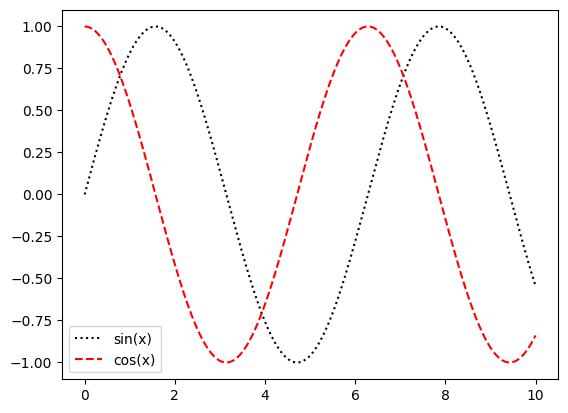

In [68]:
x = np.linspace(0,10,1000)
plt.plot(x, np.sin(x), 'k:', label = 'sin(x)')
plt.plot(x, np.cos(x), 'r--', label = 'cos(x)')
plt.legend()
plt.show()

note here we use 'k:' to indicate the line of sin function to be black (indicated by k) and dotted (indicated by :). line style and color codes can be combined into a single non-keyword argument in the plt.plot() function

lesson 2 : Linear regression
what is machine learning?
machine learning is a subject of data science, is the scientific study of computational algorithms and statistical models to perform specific tasks through patterns and inference instead of explicit instructions. machine learning can be described a set of tools to build models on data. 

supervised and unsupervised learning
in machine learning, we talk about supervised and unsupervised learning. supervised learning is when we have a known target (also called label) based on past data ( for example, predicting what price of house will sell for) and unsupervised learning is when there isn't a known past answer (for example, determining the topics discussed in restaurant reviews)

scikit-learn
scikit-learn, one of the best known machine learning libraries in python for machine learning, implements a large number of commonly used algorithms. regardless of the type of algorithm, the syntax follows the same workflow

import -> instantiate -> fit -> predict

once the basic use and syntax of scikit learn is understood for one model, switching to a new algorithm is straightforward. 

 instantiate is the part where you create the model ( by choosing an algorithm ) and then assign it to a variable. in other words, you create an INSTANCE 
for example
model = linearRegression()

Linear Regression
it is a simple supervised learning model. Linear regression fits a straight line to data
mathematically:
y = b + mx

where b is the intercept and m is the slope, x is a feature or an input, whereas y is label or an output. our job is to find m and b such that the errors are minimised


correlation matrix
to understand the relationship among features (columns), a correlation matrix is very useful in the exploratory data analysis. correlation measures linear relationships between variables. we can construct a correlation matrix to show correlation coefficients between variables it is symmetric where each element is a correlation coefficient ranging from -1 and 1. a value near 1 indicates a strong positive correlation between variables. we can create a correlation matrix using the 'corr' function

two variables are perfectly correlated when the correlation coefficient is between 0.9-1 and -0.9 - -1

it would worth noting that a negative correlation does not imply the two features of the data are unrelated to one another. rather, as the correlation approaches 0, there is less of a relationship between the features. in fact, if the correlation is negative, the closer you get to -1, the more related the features are! the parity ( positive or negative) just indicates the type of relationship the features share.

 close to +1 -> as one variable increases, so does the other (direct relationship)
 close to -1 -> as one variable increases, the other decreases (inverse relationship)
 close to 0 -> you can't expect an increase in one variable to predict the other's behavior well (no/minimal relationship)

 the values along the diagonal of the correlation matrix are all 1 because each column is identically correlated to itself

In [59]:
from sklearn.datasets import load_breast_cancer

KeyboardInterrupt: 

In [ ]:
breast = load_breast_cancer()

In [ ]:
breast

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

Instantiating the model
in scikit-learn, every class of model is represented by a class in python. A class of model is not the same as an instance of a model. recall that instance is an individual object of a certain class. thus, we first import the linear regression class, then instantiate the model, that is to create an instance of the class LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

Train-test split
now we split the data into training and testing sets. why? to assess the performance of the model on newly unseen data. we train the model using a training set, and save the testing set for evaluation

a good rule of thumb is to split data 70-30, that is 70% of data is used for training and 30% for testing. we use train_test_split function inside scikit-learn's module model selection to split the data into two random subsets. set random_state so that the results are reproducible

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.model_selection import train_test_split

fitting the model
in short, fitting is equal to training. it fits the model to the training data and finds the coefficients specified in the linear regression model, i.e, intercept and slope. after it is trained, the model can be used to make predictions

now let us apply the model to data. remember, we save the testing data to report the model performance and only use the training set to build the model. the syntax is

model.fit(X_train, Y_train)

parameter estimates
the linear regression model has been fitted, what it means is that both parameters, the intercept and the slope, have been learned. what are they? in scikit-learn, by convention all model parameters have trailing underscores, for example to access the estimated intercept from the model, rounded to the 2nd decimal for better display

# model.intercept_.round(2)

# model.coef_.round(2)

prediction
once the model is trained, supervised machine learning will evaluate test data based on previous predictions for the unseen data. we can make prediction using predict() method

Residuals
# plt.scatter(X_test, Y_test, label = 'testing data');
